# *Monod* demonstration: fit to neural cell types

lol I need to rewrite this

## Metadata and prerequisites

In [1]:
import time
t1 = time.time()

Define the dataset metadata and disk locations.

In [2]:
subcluster_names = ['l23it','l5it','l6it', 'l56np', 'l6ct']
dataset_names = ['allen_B08_'+y  for y in subcluster_names] 
loom_filepaths = ['/home/ggorin/count_data/loom_allen_celltype_kb/test/'+x+'.loom' for x in dataset_names] 

transcriptome_filepath = '/home/ggorin/projects/seq-cme-technoise/polyA_ref/gg_200524_mouse_genome_polyA_cum_1'
attribute_names=['spliced','unspliced','gene_name','barcode']

In [3]:
import sys
sys.path.insert(0, '/home/ggorin/projects/monod/src/')
import monod
from monod.preprocess import *
from monod.extract_data import extract_data
import monod.cme_toolbox as cme_toolbox
from monod.cme_toolbox import CMEModel
import monod.inference as inference
from monod.inference import InferenceParameters, GradientInference
import monod.analysis as analysis
from monod.analysis import *

## Preprocessing

Construct a batch by finding 3,000 genes which have at least moderate expression across all datasets. Visualize the set of genes (purple) that meet the expression filtering criteria.

In [35]:
dir_string,dataset_strings = construct_batch(loom_filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./fits',meta='allen_celltypes',batch_id=1,\
                                             n_genes=3000,viz=False)

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Dataset: allen_B08_l23it
INFO:root:621 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:5864 genes retained after expression filter.
INFO:root:Dataset: allen_B08_l5it
INFO:root:1702 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:6759 genes retained after expression filter.
INFO:root:Dataset: allen_B08_l6it
INFO:root:471 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:5773 genes retained after expression filter.
INFO:root:Dataset: allen_B08_l56np
INFO:root:191 cells detected.
INFO:root:32285 features observed, 32005 match genome annotations. 31649 were unique.
INFO:root:4268 genes retained after expression filter.
INFO:root:Dataset: allen_B08_l6ct
INFO:root:1359 cells detected.
INFO:root:32285 features observed, 32005 match genome anno

Define the models to analyze.

In [36]:
models = ('Bursty','CIR','Extrinsic')

In [37]:
n_models = len(models)
n_datasets = len(dataset_names)

## Inference

Define parameter bounds, then iterate over datasets and models and perform the fits.

This is easily parallelized.

In [38]:
print('hi')

hi


In [39]:
# lb = [[-2.0, -2, -2],
#       [-2.0, -1.8, -1.8],
#       [-2.0, -1.8, -1.8]]
# ub = [[4.2, 2.5, 3.5],
#       [4.2, 2.5, 3.5],
#       [4.2, 2.5, 3.5]]
# grid = [1,1]

def par_fun(x):
    models = ('Bursty','CIR','Extrinsic')
    n_models = len(models)
    fp,tx,dn,ds,dirs,att = x
    print(x[0])
    for j in range(n_models):
        print(models[j])
        fitmodel = CMEModel(models[j],'None')
        inference_parameters = InferenceParameters([-2.0, -2.0, -2.0],[4.2, 2.5, 3.5],[1,1],[1,1],[1,1],\
                    ds,fitmodel,use_lengths = False,
                    gradient_params = {'max_iterations':10,'init_pattern':'moments','num_restarts':1})
        if j==0:
            search_data = extract_data(fp,tx,dn,
                                ds,dirs,dataset_attr_names=att)
        else:
            search_data = load_search_data(ds+'/raw.sd')
        full_result_string = inference_parameters.fit_all_grid_points(1,search_data)
        result_strings.append(full_result_string)
    return result_strings
try:
    pool = multiprocessing.Pool(processes=5)
    iterable = zip(loom_filepaths,[transcriptome_filepath]*n_datasets,dataset_names,dataset_strings,\
        [dir_string]*n_datasets,[attribute_names]*n_datasets)
    result_strings = pool.map(par_fun, iterable)
    pool.close()
    pool.join()
except:
    pool.terminate()
    pool.join()


/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l5it.loom/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l23it.loom/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l56np.loom/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l6ct.loom/home/ggorin/count_data/loom_allen_celltype_kb/test/allen_B08_l6it.loom




BurstyBurstyBurstyBurstyBursty




INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Global inference parameters stored to ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/Bursty_None_1x1/parameters.pr.
INFO:root:Global inference parameters stored to ./fits/gg_220802_022_allen_celltypes_

INFO:root:Runtime: 169.1 seconds.
Extrinsic
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Global inference parameters stored to ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l56np/Extrinsic_None_1x1/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l56np/raw.sd.
INFO:root:Starting non-parallelized grid scan.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Runtime: 35.1 seconds.
INFO:root:Non-parallelized grid scan complete.
INFO:root:All grid point data cleaned from disk.
INFO:root:Runtime: 247.1 seconds.
Extrinsic
INFO:root:Sequencing model set to None. All sampling parameters set to null.
INFO:root:Global inference parameters stored to ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6it/Extrinsic_None_1x1/parameters.pr.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6it/raw.sd.
INFO:root:Starting n

In [40]:
# dir_string = './fits/gg_220802_022_allen_celltypes_1'
sd_strings = [dir_string+'/'+x+'/raw.sd' for x in dataset_names]
sd_arr = [load_search_data(x) for x in sd_strings]


INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l23it/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6it/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l56np/raw.sd.
INFO:root:Search data loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6ct/raw.sd.


Select the result strings corresponding to the bursty model, which will be used for differential regulation analysis.

In [41]:
# result_strings = [dir_string+'/'+x+'/Bursty_Poisson_20x21/grid_scan_results.res' for x in dataset_names]
# n_datasets = len(result_strings)

In [42]:
models

('Bursty', 'CIR', 'Extrinsic')

In [43]:
result_strings = [[dir_string+'/'+x+'/'+y+'_None_1x1/grid_scan_results.res' for x in dataset_names] for y in models]

In [44]:
# result_strings = [list(np.asarray(result_strings)[range(i,n_datasets*n_models,n_models)]) for i in range(n_models)]

In [45]:
sr_arr = []


for j in range(n_datasets):
#     sd = sd_arr[j]
    sr_ = []
    for k in range(n_models):
        loaded_res = load_search_results(result_strings[k][j])
        loaded_res.find_sampling_optimum()
        sr_.append(loaded_res)
    
    make_batch_analysis_dir(sr_,dir_string)
#     sd_arr.append(sd)
    sr_arr.append(sr_)


INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l23it/Bursty_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l23it/CIR_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l23it/Extrinsic_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/Bursty_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/CIR_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l5it/Extrinsic_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen_celltypes_1/allen_B08_l6it/Bursty_None_1x1/grid_scan_results.res.
INFO:root:Grid scan results loaded from ./fits/gg_220802_022_allen

In [471]:
[sd.n_cells for sd in sd_arr]

[621, 1702, 471, 191, 1359]

0
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l23it.png.
1
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l5it.png.
2
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l6it.png.
3
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l56np.png.
4
INFO:root:Figure stored to ./fits/gg_220802_022_allen_celltypes_1/analysis_figures/AIC_comparison_allen_B08_l6ct.png.


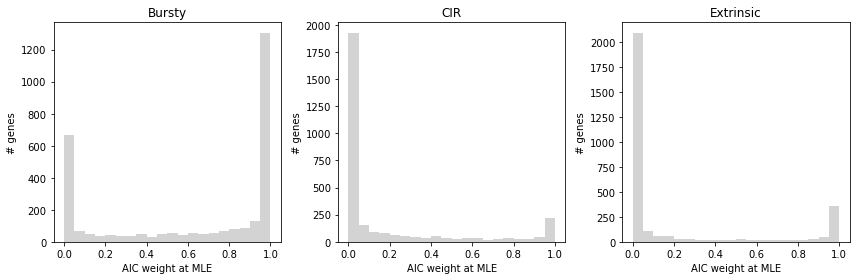

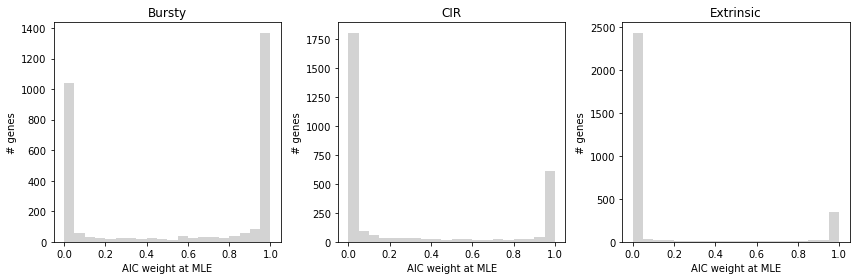

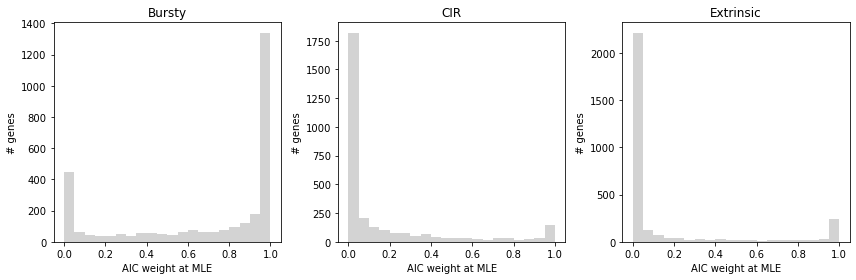

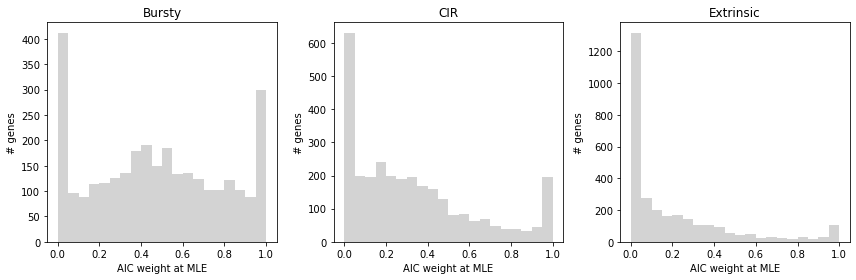

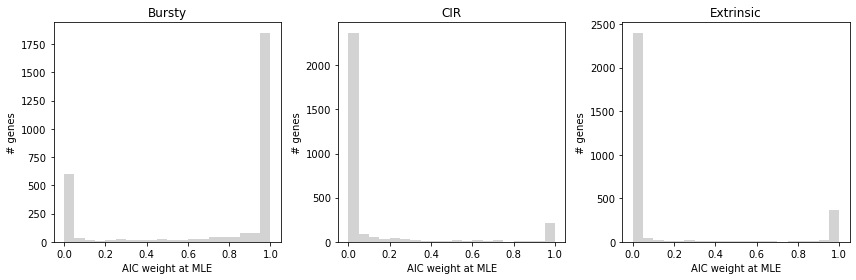

In [46]:
w = []
for j in range(n_datasets):
    print(j)
    w_ = plot_AIC_weights(sr_arr[j],sd_arr[j],models,meta=dataset_names[j],savefig=True)
    w.append(w_)

In [47]:
w = np.asarray(w)

In [48]:
# import plotly
# import plotly.express as px
# import pandas as pd

In [427]:
# thr = 0.8
gf_gou = (w[:,0,:]>0.9).all(0)
gf_cir = (w[:,1,:]>0.5).all(0)
gf_ext = (w[:,2,:]>0.8).all(0)

In [428]:
gf_gou.sum()

224

In [429]:
gf_cir.sum()

52

In [430]:
gf_ext.sum()

77

In [431]:
gn = sd_arr[0].gene_names

In [432]:
gf_cir.sum()+gf_gou.sum()+gf_ext.sum()

353

In [433]:
len(gn)

3000

In [434]:
gfs = [gf_gou,gf_cir,gf_ext]

In [435]:
chisq_thr = 5
gene_inds_kept = []
# for model_ind in range(1,2):
for model_ind in range(n_models):
    n_genes = gfs[model_ind].sum()
    gene_inds = np.where(gfs[model_ind])[0]
    keep = np.zeros((n_genes,n_datasets),dtype=bool)
    pval = np.zeros((n_genes,n_datasets))
    for gene_count,gene_ind in enumerate(gene_inds):
        for dataset in range(n_datasets):
            lm = [sd_arr[dataset].M[gene_ind], sd_arr[dataset].N[gene_ind]]
            pars = sr_arr[dataset][model_ind].phys_optimum[gene_ind]
            expect_freq = sr_arr[dataset][model_ind].model.eval_model_pss(pars,lm) * sd_arr[dataset].n_cells
            
            unique_values,counts = np.unique(np.vstack(\
                       (sd_arr[dataset].U[gene_ind],sd_arr[dataset].S[gene_ind])).astype(int),axis=1,\
                        return_counts=True) #create the dataset of observed counts
            expect_freq = expect_freq[unique_values[0],unique_values[1]]
                #the added bin accounts for all the stuff that's not in the 
                #observed categories
            expect_freq = np.concatenate((expect_freq,[sd_arr[dataset].n_cells-expect_freq.sum()]))
            counts = np.concatenate((counts,[0])) 
            
            filt = (expect_freq>chisq_thr) & (counts>chisq_thr)
            observed = np.concatenate((counts[filt],[counts[~filt].sum()]))
            proposed = np.concatenate((expect_freq[filt],[expect_freq[~filt].sum()])) #this is incredibly severe.
            csq = scipy.stats.mstats.chisquare(observed, proposed, 3) #3 dof because models have 3 parameters...
            pval[gene_count,dataset] = csq.pvalue
            if csq.pvalue>0.01:
                keep[gene_count,dataset] = True
                
    gene_inds_kept.append(gene_inds[keep.all(1)])


In [436]:
# pval[keep.all(1),:]

In [437]:
[len(x) for x in gene_inds_kept]

[33, 15, 21]

In [438]:
np.where(gn=='Pura')

(array([2487]),)

blue is GOU (model 0), red is CIR (model 1)

In [454]:
ds=1

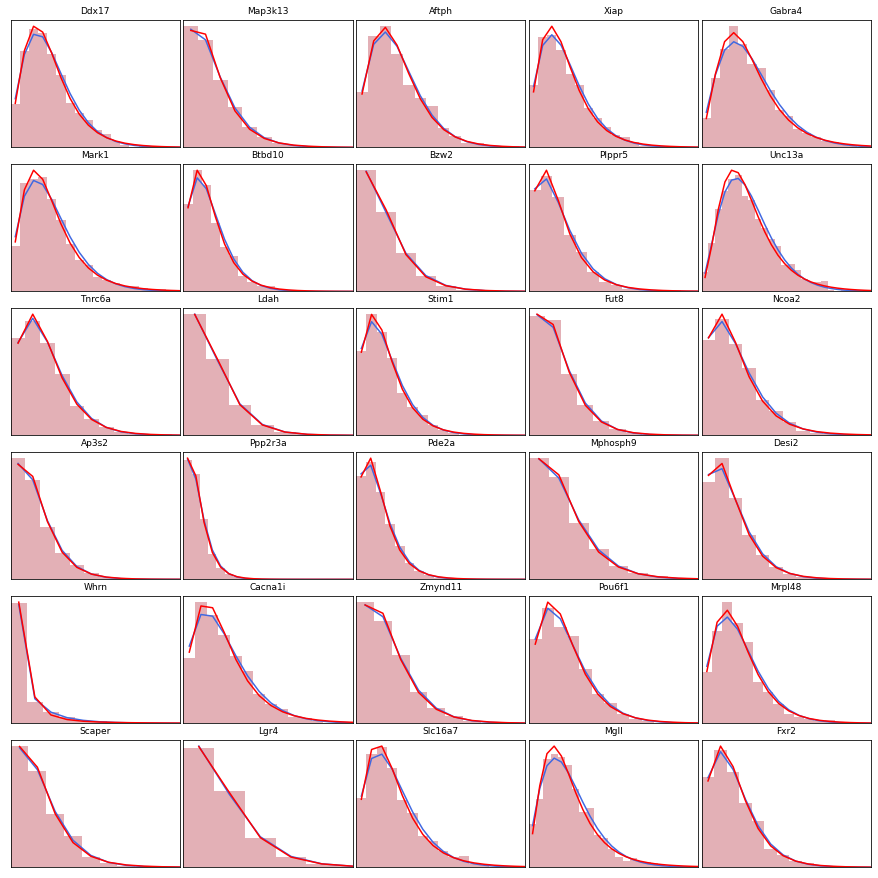

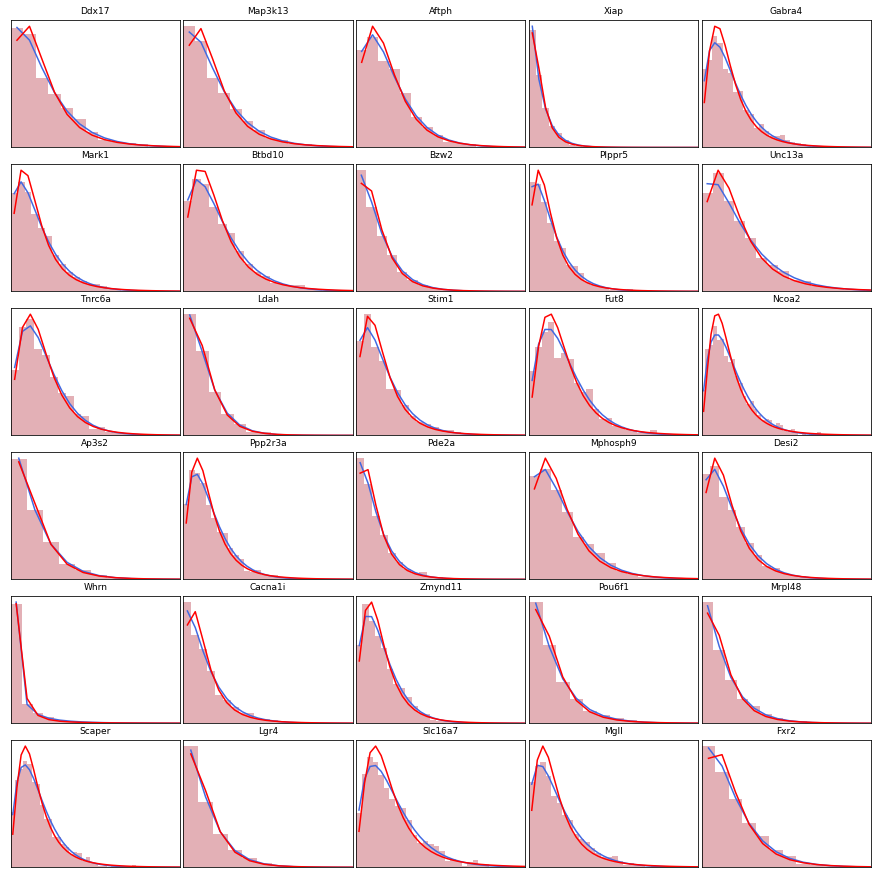

In [455]:
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[0],\
                           sz=(6,5),figsize=(12,12),
                           marg='mature')
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[0],\
                           sz=(6,5),figsize=(12,12),
                           marg='nascent')

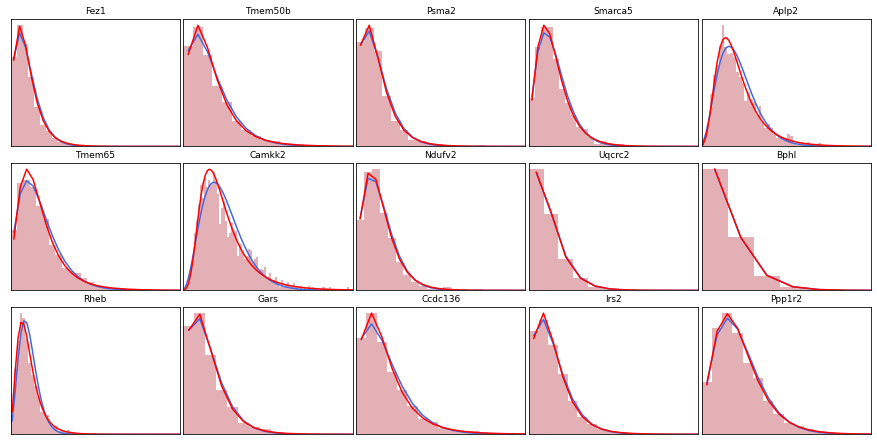

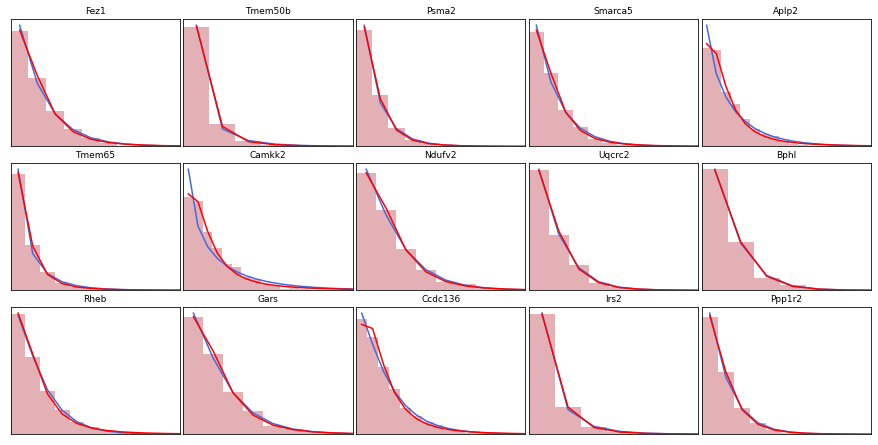

In [456]:
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[1],\
                           sz=(3,5),figsize=(12,6),
                           marg='mature')
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[1],\
                           sz=(3,5),figsize=(12,6),
                           marg='nascent')

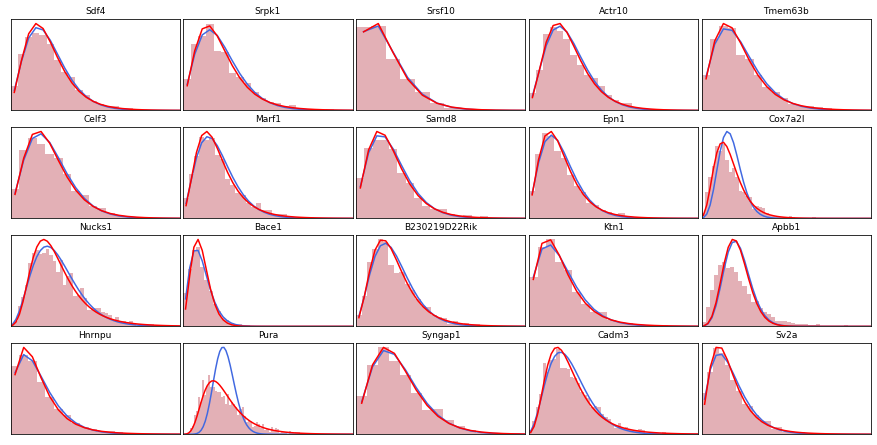

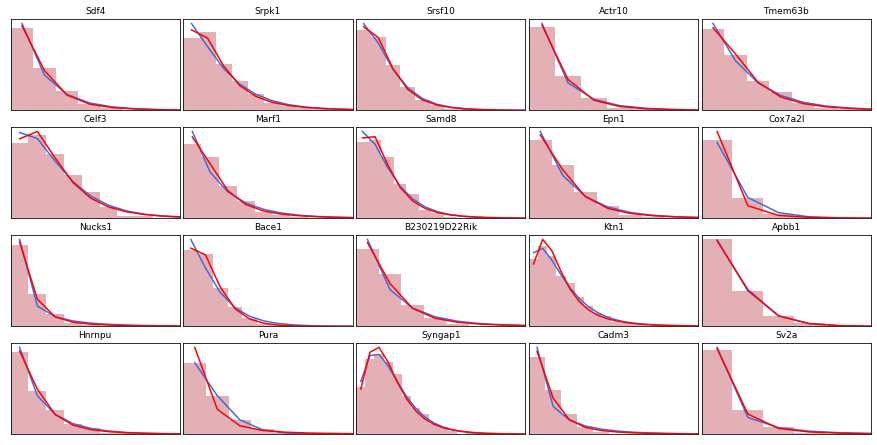

In [457]:
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[2],\
                           sz=(4,5),figsize=(12,6),
                           marg='mature')
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][1]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[2],\
                           sz=(4,5),figsize=(12,6),
                           marg='nascent')

Also the "extrinsic" genes, but now red is extrinsic

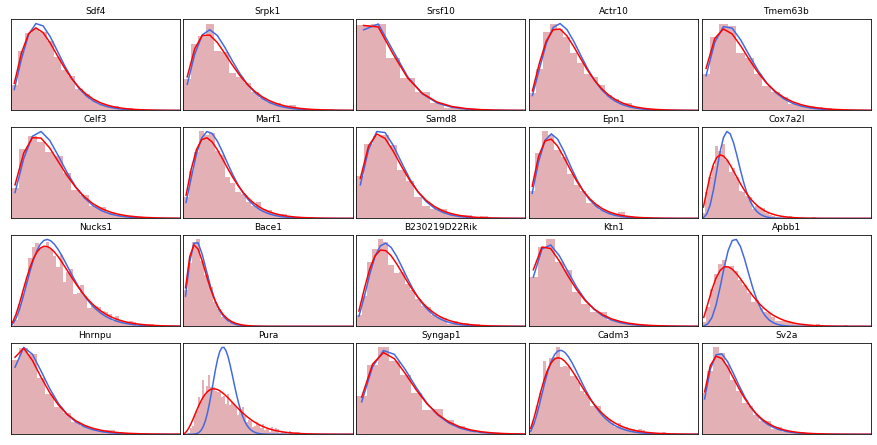

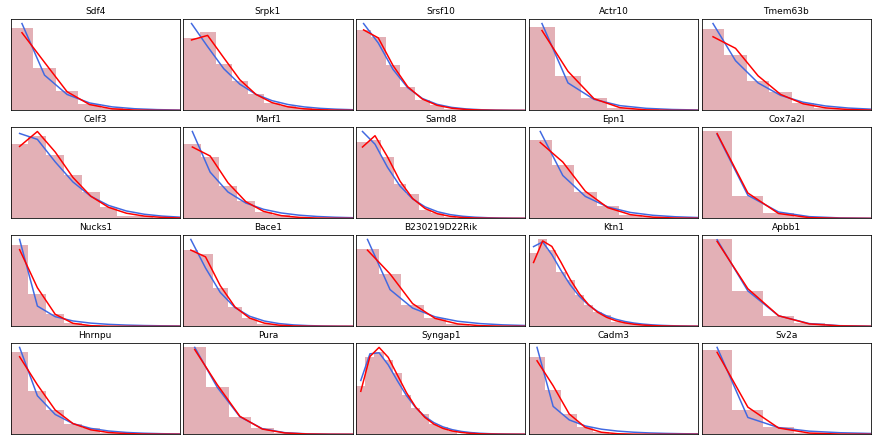

In [458]:
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][2]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[2],\
                           sz=(4,5),figsize=(12,6),
                           marg='mature')
compare_gene_distributions([sr_arr[ds][0],sr_arr[ds][2]],[sd_arr[ds],sd_arr[ds]],genes_to_plot=gene_inds_kept[2],\
                           sz=(4,5),figsize=(12,6),
                           marg='nascent')

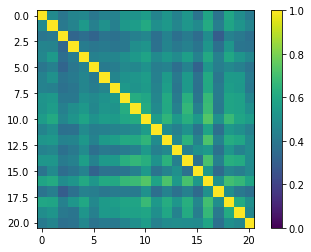

In [470]:
plt.imshow(np.corrcoef(sd_arr[ds].S[gene_inds_kept[2]]),vmin=0,vmax=1)
plt.colorbar()

In [460]:
# gn[gene_inds_kept[1]]

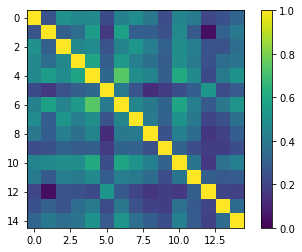

In [469]:
plt.imshow(np.corrcoef(sd_arr[ds].S[gene_inds_kept[1]]),vmin=0,vmax=1)
plt.colorbar()

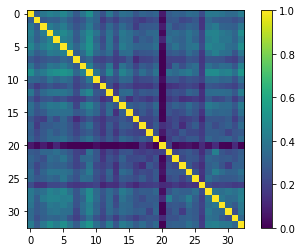

In [468]:
plt.imshow(np.corrcoef(sd_arr[ds].S[gene_inds_kept[0]]),vmin=0,vmax=1)
plt.colorbar()

In [34]:
time.time()-t1

758.443329334259

In [ ]:
n_cells = np.asarray([sd.n_cells for sd in sd_arr])
subtype_weights = n_cells/n_cells.sum()

In [562]:
results = []
for model_ind in range(n_models):
    data = {'meta':models[model_ind],'genes':gn[gene_inds_kept[model_ind]],'aic':w[:,:,gene_inds_kept[model_ind]]}
    n_genes = len(data['genes'])
    pars = np.zeros((n_genes,n_datasets,3))
    for gene_count,gene_ind in enumerate(gene_inds_kept[model_ind]):
        for dataset in range(n_datasets):
            pars[gene_count,dataset] = sr_arr[dataset][model_ind].phys_optimum[gene_ind]
    data['pars'] = pars
    data['par_initial_guess'] = (pars*subtype_weights[None,:,None]).sum(1)
    results.append(data)


In [563]:
# (pars*subtype_weights[None,:,None]).sum(1)

In [564]:
with open('/home/ggorin/projects/GVFP_2021/fits/gg_220802_022_allen_celltypes_1/weights_and_genes.pickle','wb') as rfs:
    pickle.dump(results,rfs)

Likelihood ratios

In [503]:
gene_inds_kept[0]

array([  85,  116,  161,  417,  449,  482,  687,  762,  781,  960, 1145,
       1292, 1303, 1351, 1355, 1404, 1496, 1555, 1633, 1664, 1813, 1988,
       2069, 2308, 2491, 2558, 2577, 2587, 2606, 2648, 2691, 2895, 2967])

In [840]:
dataset=0
# gene_ind = gene_inds_kept[0][0]
# unique_values,counts = np.unique(np.vstack(\
#                        (sd_arr[dataset].U[gene_ind],sd_arr[dataset].S[gene_ind])).astype(int),axis=1,\
#                         return_counts=True)

In [843]:
def par_fun_fullfit(fitinput):
    U,S,reduced_guess,limit = fitinput
    pars_sde_gou = convert_pars(get_MLE('GOU',U,S,reduced_guess,disp=False,limit=limit))
    pars_sde_cir = convert_pars(get_MLE('CIR',U,S,reduced_guess,disp=False,limit=limit))
    lik_ratio, logL_gou, logL_cir = get_lik_ratio(pars_sde_gou,pars_sde_cir,U,S)
    return lik_ratio,pars_sde_gou,pars_sde_cir,logL_gou, logL_cir


In [844]:
model_set = 0
try:
    genes_to_run = gene_inds_kept[model_set][:5]
    n_genes_to_run = len(genes_to_run)
    pool = multiprocessing.Pool(processes=5)
    fit_iterable = zip(sd_arr[dataset].U[genes_to_run],\
                       sd_arr[dataset].S[genes_to_run],\
                       results[model_set]['par_initial_guess'][:n_genes_to_run],\
                       ['fast']*n_genes_to_run)
    gou_results = pool.map(par_fun_fullfit, fit_iterable)
    pool.close()
    pool.join()
except:
    print('failed')
    pool.terminate()
    pool.join()


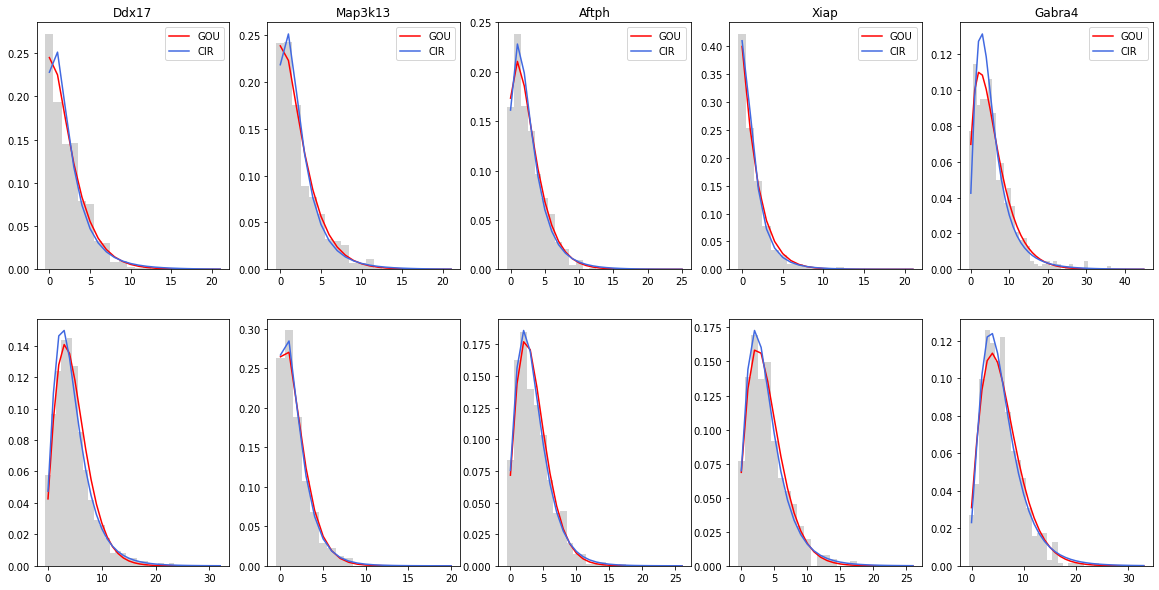

In [845]:
fig1,ax1=plt.subplots(2,5,figsize=(20,10))

gou_reduced_color='lightcoral'
cir_reduced_color='skyblue'
gou_color='r'
cir_color='royalblue'

for k,gene_ind in enumerate(genes_to_run):
    mx = [sd_arr[dataset].M[gene_ind],sd_arr[dataset].N[gene_ind]]

    bins = np.arange(mx[0]-8)-0.5
    ax1[0,k].hist(sd_arr[dataset].U[gene_ind],bins,color='lightgray',density=True)
    ax1[0,k].set_title(gn[gene_ind])
    
    pars_sde_gou = gou_results[k][1]
    pars_sde_cir = gou_results[k][2]

    y = get_GOU_2sp([mx[0],1],pars_sde_gou)
    ax1[0,k].plot(y,'-',color=gou_color,label='GOU')
    y = get_CIR_2sp([mx[0],1],pars_sde_cir)
    ax1[0,k].plot(y,'-',color=cir_color,label='CIR')
    ax1[0,k].legend()

    bins = np.arange(mx[1]-8)-0.5
    ax1[1,k].hist(sd_arr[dataset].S[gene_ind],bins,color='lightgray',density=True)

    y = get_GOU_2sp([1,mx[1]],pars_sde_gou).squeeze()
    ax1[1,k].plot(y,'-',color=gou_color)
    y = get_CIR_2sp([1,mx[1]],pars_sde_cir).squeeze()
    ax1[1,k].plot(y,'-',color=cir_color)


In [846]:
model_set = 1
try:
    genes_to_run = gene_inds_kept[model_set][:5]
    n_genes_to_run = len(genes_to_run)
    pool = multiprocessing.Pool(processes=5)
    fit_iterable = zip(sd_arr[dataset].U[genes_to_run],\
                       sd_arr[dataset].S[genes_to_run],\
                       results[model_set]['par_initial_guess'][:n_genes_to_run],\
                       ['fast']*n_genes_to_run)
    cir_results = pool.map(par_fun_fullfit, fit_iterable)
    pool.close()
    pool.join()
except:
    print('failed')
    pool.terminate()
    pool.join()


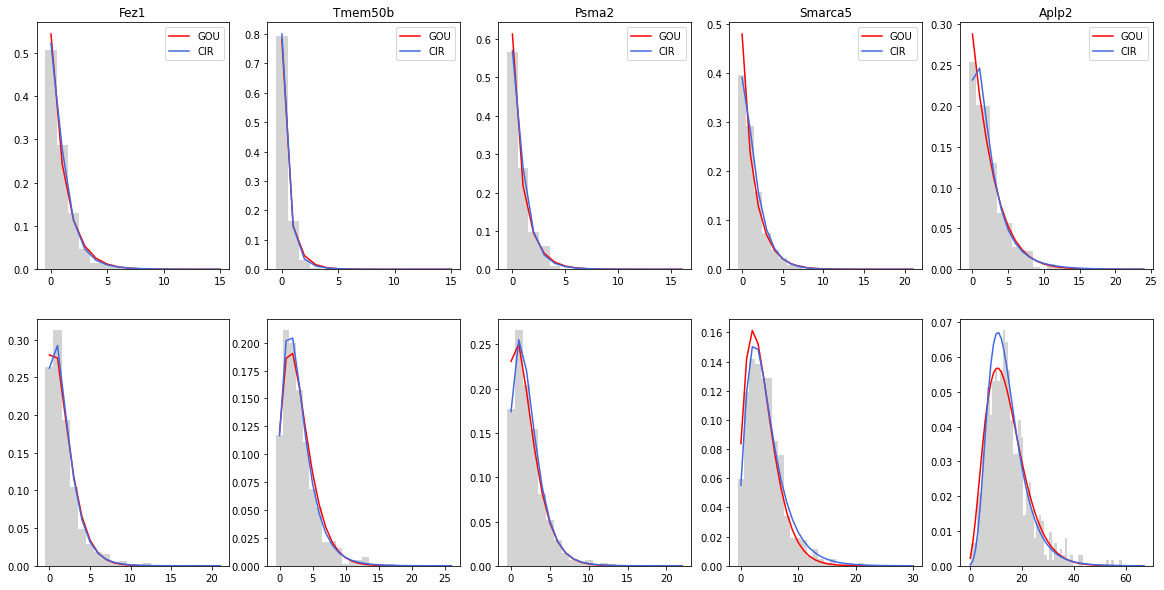

In [847]:
fig1,ax1=plt.subplots(2,5,figsize=(20,10))

gou_reduced_color='lightcoral'
cir_reduced_color='skyblue'
gou_color='r'
cir_color='royalblue'

for k,gene_ind in enumerate(genes_to_run):
    mx = [sd_arr[dataset].M[gene_ind],sd_arr[dataset].N[gene_ind]]

    bins = np.arange(mx[0]-8)-0.5
    ax1[0,k].hist(sd_arr[dataset].U[gene_ind],bins,color='lightgray',density=True)
    ax1[0,k].set_title(gn[gene_ind])
    
    pars_sde_gou = cir_results[k][1]
    pars_sde_cir = cir_results[k][2]

    y = get_GOU_2sp([mx[0],1],pars_sde_gou)
    ax1[0,k].plot(y,'-',color=gou_color,label='GOU')
    y = get_CIR_2sp([mx[0],1],pars_sde_cir)
    ax1[0,k].plot(y,'-',color=cir_color,label='CIR')
    ax1[0,k].legend()

    bins = np.arange(mx[1]-8)-0.5
    ax1[1,k].hist(sd_arr[dataset].S[gene_ind],bins,color='lightgray',density=True)

    y = get_GOU_2sp([1,mx[1]],pars_sde_gou).squeeze()
    ax1[1,k].plot(y,'-',color=gou_color)
    y = get_CIR_2sp([1,mx[1]],pars_sde_cir).squeeze()
    ax1[1,k].plot(y,'-',color=cir_color)


In [887]:
model_set = 2
try:
    genes_to_run = gene_inds_kept[model_set][:5]
    n_genes_to_run = len(genes_to_run)
    pool = multiprocessing.Pool(processes=5)
    fit_iterable = zip(sd_arr[dataset].U[genes_to_run],\
                       sd_arr[dataset].S[genes_to_run],\
                       results[model_set]['par_initial_guess'][:n_genes_to_run],\
                       ['slow']*n_genes_to_run)
    ext_results = pool.map(par_fun_fullfit, fit_iterable)
    pool.close()
    pool.join()
except:
    print('failed')
    pool.terminate()
    pool.join()


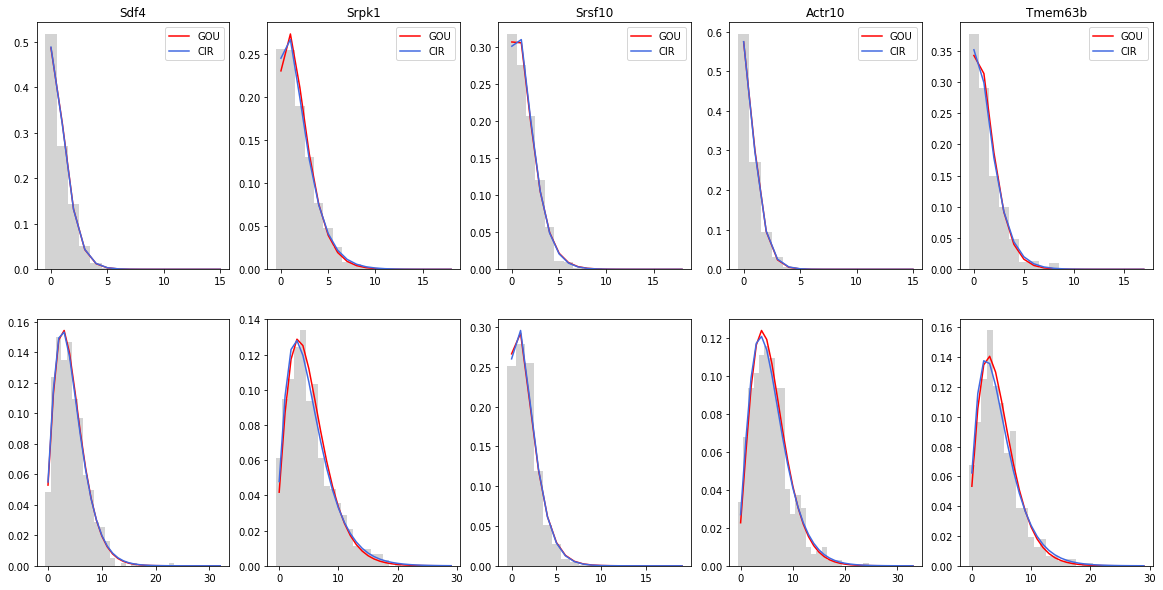

In [888]:
fig1,ax1=plt.subplots(2,5,figsize=(20,10))

gou_reduced_color='lightcoral'
cir_reduced_color='skyblue'
gou_color='r'
cir_color='royalblue'

for k,gene_ind in enumerate(genes_to_run):
    mx = [sd_arr[dataset].M[gene_ind],sd_arr[dataset].N[gene_ind]]

    bins = np.arange(mx[0]-8)-0.5
    ax1[0,k].hist(sd_arr[dataset].U[gene_ind],bins,color='lightgray',density=True)
    ax1[0,k].set_title(gn[gene_ind])
    
    pars_sde_gou = ext_results[k][1]
    pars_sde_cir = ext_results[k][2]

    y = get_GOU_2sp([mx[0],1],pars_sde_gou)
    ax1[0,k].plot(y,'-',color=gou_color,label='GOU')
    y = get_CIR_2sp([mx[0],1],pars_sde_cir)
    ax1[0,k].plot(y,'-',color=cir_color,label='CIR')
    ax1[0,k].legend()

    bins = np.arange(mx[1]-8)-0.5
    ax1[1,k].hist(sd_arr[dataset].S[gene_ind],bins,color='lightgray',density=True)

    y = get_GOU_2sp([1,mx[1]],pars_sde_gou).squeeze()
    ax1[1,k].plot(y,'-',color=gou_color)
    y = get_CIR_2sp([1,mx[1]],pars_sde_cir).squeeze()
    ax1[1,k].plot(y,'-',color=cir_color)


In [889]:
lik_ratios = [x[0] for x in gou_results] + [x[0] for x in cir_results] + [x[0] for x in ext_results] 

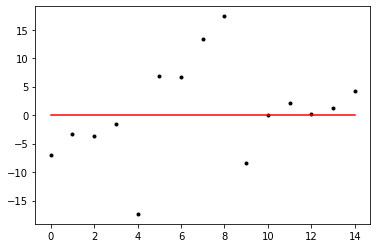

In [890]:
plt.plot(lik_ratios,'k.')
plt.plot([0,14],[0,0],'r-')

In [891]:
lik_ratios

[-7.050671762281581,
 -3.292086861855296,
 -3.588405270390467,
 -1.6430169745017338,
 -17.351154125851735,
 6.883388567791599,
 6.650901735389198,
 13.378191414031335,
 17.363325752151468,
 -8.328673078016436,
 0.029373960029715818,
 2.2111112581978887,
 0.14455740894413793,
 1.174796323800365,
 4.265920123675642]

Real data analysis


In [923]:
# n_restarts = 4

In [924]:
cell_type_names = ['C01','B08','H12','F08']
dataset_names = ['allen_'+y+'_glu'  for y in cell_type_names] 
cell_type_looms = ['/home/ggorin/count_data/loom_allen_celltype_kb/test/'+x+'.loom' for x in dataset_names] 
test_data_ind = 2
with lp.connect(cell_type_looms[test_data_ind]) as ds:
    U = ds.layers['unspliced'][:]
    S = ds.layers['spliced'][:]
    loom_gene_names = ds.ra['gene_name']

In [926]:
n_cores = 20

In [927]:
model_set = 0
try:
    genes_to_run = gene_inds_kept[model_set]
    gene_locations = [np.where(loom_gene_names==x)[0][0] for x in gn[genes_to_run]]
    n_genes_to_run = len(genes_to_run)
    pool = multiprocessing.Pool(processes=n_cores)
    fit_iterable = zip(U[gene_locations],\
                       S[gene_locations],\
                       results[model_set]['par_initial_guess'][:n_genes_to_run],\
                       ['fast']*n_genes_to_run)
    gou_results_test = pool.map(par_fun_fullfit, fit_iterable)
    pool.close()
    pool.join()
except:
    print('failed')
    pool.terminate()
    pool.join()


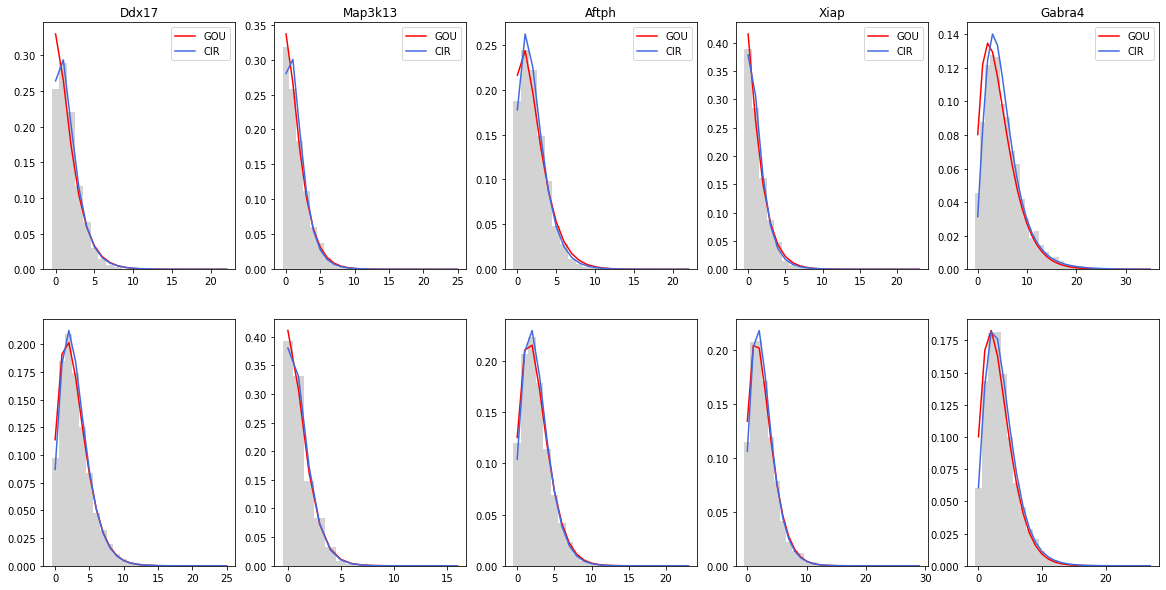

In [947]:
fig1,ax1=plt.subplots(2,5,figsize=(20,10))

gou_reduced_color='lightcoral'
cir_reduced_color='skyblue'
gou_color='r'
cir_color='royalblue'

model_set=0
genes_to_run = gene_inds_kept[model_set]
gene_locations = [np.where(loom_gene_names==x)[0][0] for x in gn[genes_to_run]]


for k,gene_ind in enumerate(gene_locations[:5]):
    mx = np.asarray([U[gene_ind].max()+10,S[gene_ind].max()+10],dtype=int)

    bins = np.arange(mx[0]-8)-0.5
    ax1[0,k].hist(U[gene_ind],bins,color='lightgray',density=True)
    ax1[0,k].set_title(loom_gene_names[gene_ind])
    
    pars_sde_gou = gou_results_test[k][1]
    pars_sde_cir = gou_results_test[k][2]

    y = get_GOU_2sp([mx[0],1],pars_sde_gou)
    ax1[0,k].plot(y,'-',color=gou_color,label='GOU')
    y = get_CIR_2sp([mx[0],1],pars_sde_cir)
    ax1[0,k].plot(y,'-',color=cir_color,label='CIR')
    ax1[0,k].legend()

    bins = np.arange(mx[1]-8)-0.5
    ax1[1,k].hist(S[gene_ind],bins,color='lightgray',density=True)

    y = get_GOU_2sp([1,mx[1]],pars_sde_gou).squeeze()
    ax1[1,k].plot(y,'-',color=gou_color)
    y = get_CIR_2sp([1,mx[1]],pars_sde_cir).squeeze()
    ax1[1,k].plot(y,'-',color=cir_color)


In [928]:
model_set = 1
try:
    genes_to_run = gene_inds_kept[model_set]
    gene_locations = [np.where(loom_gene_names==x)[0][0] for x in gn[genes_to_run]]
    n_genes_to_run = len(genes_to_run)
    pool = multiprocessing.Pool(processes=n_cores)
    fit_iterable = zip(U[gene_locations],\
                       S[gene_locations],\
                       results[model_set]['par_initial_guess'][:n_genes_to_run],\
                       ['fast']*n_genes_to_run)
    cir_results_test = pool.map(par_fun_fullfit, fit_iterable)
    pool.close()
    pool.join()
except:
    print('failed')
    pool.terminate()
    pool.join()


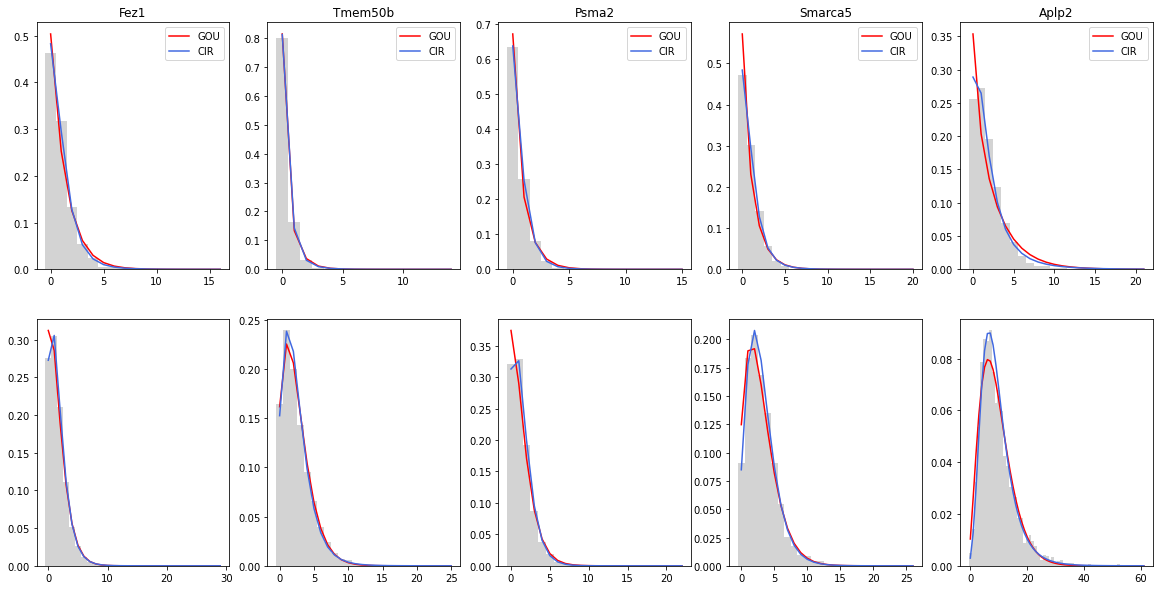

In [945]:
fig1,ax1=plt.subplots(2,5,figsize=(20,10))

model_set=1
genes_to_run = gene_inds_kept[model_set]
gene_locations = [np.where(loom_gene_names==x)[0][0] for x in gn[genes_to_run]]


gou_reduced_color='lightcoral'
cir_reduced_color='skyblue'
gou_color='r'
cir_color='royalblue'

for k,gene_ind in enumerate(gene_locations[:5]):
    mx = np.asarray([U[gene_ind].max()+10,S[gene_ind].max()+10],dtype=int)

    bins = np.arange(mx[0]-8)-0.5
    ax1[0,k].hist(U[gene_ind],bins,color='lightgray',density=True)
    ax1[0,k].set_title(loom_gene_names[gene_ind])
    
    pars_sde_gou = cir_results_test[k][1]
    pars_sde_cir = cir_results_test[k][2]

    y = get_GOU_2sp([mx[0],1],pars_sde_gou)
    ax1[0,k].plot(y,'-',color=gou_color,label='GOU')
    y = get_CIR_2sp([mx[0],1],pars_sde_cir)
    ax1[0,k].plot(y,'-',color=cir_color,label='CIR')
    ax1[0,k].legend()

    bins = np.arange(mx[1]-8)-0.5
    ax1[1,k].hist(S[gene_ind],bins,color='lightgray',density=True)

    y = get_GOU_2sp([1,mx[1]],pars_sde_gou).squeeze()
    ax1[1,k].plot(y,'-',color=gou_color)
    y = get_CIR_2sp([1,mx[1]],pars_sde_cir).squeeze()
    ax1[1,k].plot(y,'-',color=cir_color)


In [929]:
model_set = 2
try:
    genes_to_run = gene_inds_kept[model_set]
    gene_locations = [np.where(loom_gene_names==x)[0][0] for x in gn[genes_to_run]]
    n_genes_to_run = len(genes_to_run)
    pool = multiprocessing.Pool(processes=n_cores)
    fit_iterable = zip(U[gene_locations],\
                       S[gene_locations],\
                       results[model_set]['par_initial_guess'][:n_genes_to_run],\
                       ['slow']*n_genes_to_run)
    ext_results_test = pool.map(par_fun_fullfit, fit_iterable)
    pool.close()
    pool.join()
except:
    print('failed')
    pool.terminate()
    pool.join()


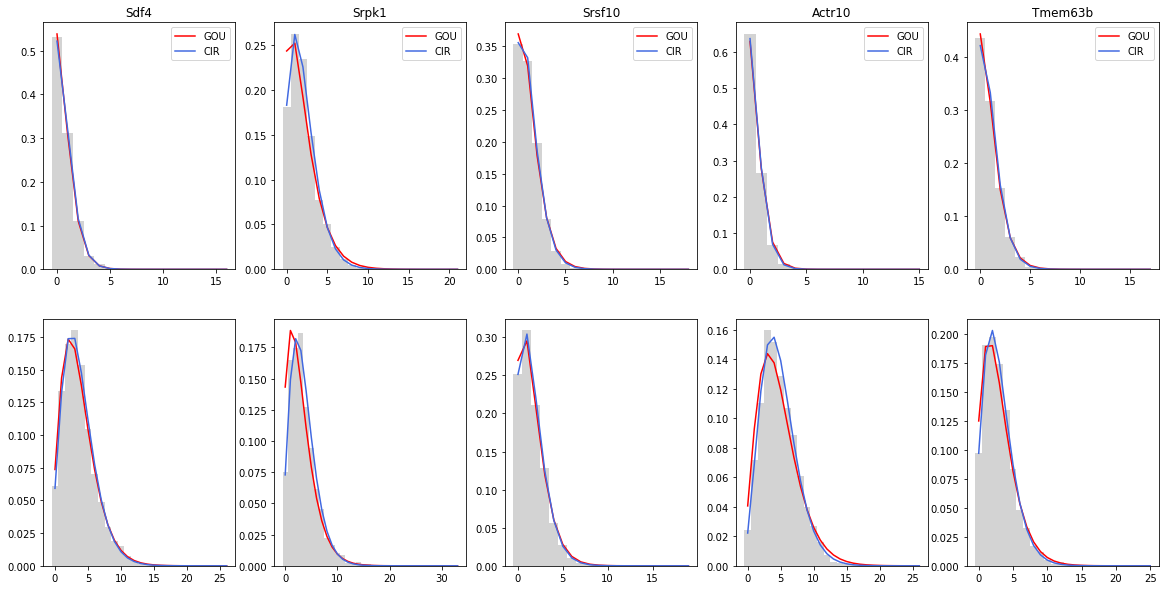

In [942]:
fig1,ax1=plt.subplots(2,5,figsize=(20,10))
model_set=2
genes_to_run = gene_inds_kept[model_set]
gene_locations = [np.where(loom_gene_names==x)[0][0] for x in gn[genes_to_run]]

gou_reduced_color='lightcoral'
cir_reduced_color='skyblue'
gou_color='r'
cir_color='royalblue'

for k,gene_ind in enumerate(gene_locations[:5]):
    mx = np.asarray([U[gene_ind].max()+10,S[gene_ind].max()+10],dtype=int)
#     print(mx)

    bins = np.arange(mx[0]-8)-0.5
    ax1[0,k].hist(U[gene_ind],bins,color='lightgray',density=True)
    ax1[0,k].set_title(loom_gene_names[gene_ind])
    
    pars_sde_gou = ext_results_test[k][1]
    pars_sde_cir = ext_results_test[k][2]

    y = get_GOU_2sp([mx[0],1],pars_sde_gou)
    ax1[0,k].plot(y,'-',color=gou_color,label='GOU')
    y = get_CIR_2sp([mx[0],1],pars_sde_cir)
    ax1[0,k].plot(y,'-',color=cir_color,label='CIR')
    ax1[0,k].legend()

    bins = np.arange(mx[1]-8)-0.5
    ax1[1,k].hist(S[gene_ind],bins,color='lightgray',density=True)

    y = get_GOU_2sp([1,mx[1]],pars_sde_gou).squeeze()
    ax1[1,k].plot(y,'-',color=gou_color)
    y = get_CIR_2sp([1,mx[1]],pars_sde_cir).squeeze()
    ax1[1,k].plot(y,'-',color=cir_color)


In [930]:
lik_ratios_test = [x[0] for x in gou_results_test] + [x[0] for x in cir_results_test] + [x[0] for x in ext_results_test] 

In [934]:
colors = ['k']*len(gou_results_test) + ['b']*len(cir_results_test) + ['g']*len(ext_results_test)

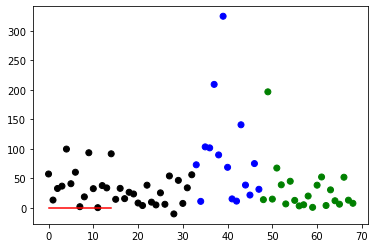

In [938]:
plt.scatter(range(len(lik_ratios_test)),lik_ratios_test,color=colors)
plt.plot([0,14],[0,0],'r-')

In [932]:
lik_ratios_test

[57.22847445113257,
 13.013755476707956,
 32.62922099881871,
 36.63289363743388,
 99.50151164624913,
 40.72332460405232,
 60.21140747487334,
 1.741059429679808,
 18.42629430836132,
 93.29058051398533,
 32.35373025839726,
 0.11316837601771113,
 37.58605552226982,
 33.6105841181743,
 91.48820963788421,
 14.26731099585777,
 32.84335925890446,
 15.399187342911318,
 26.208473118249458,
 23.31243387583345,
 7.979298081490924,
 3.6923601601265545,
 38.229708376004055,
 9.472008403727159,
 4.734362693552612,
 25.235043736780426,
 5.843305383113147,
 53.905987829526566,
 -10.519254974862633,
 46.41634499695829,
 7.2954282256851,
 33.767920166541444,
 55.91747196230426,
 72.82977663995734,
 10.777754397966419,
 103.22393812144765,
 101.55677942710645,
 209.25585242670422,
 89.57808334724723,
 324.88286369550406,
 68.56373614323638,
 14.965860263280774,
 11.209541181864552,
 140.7284395014376,
 38.43093292686535,
 21.49282948722248,
 74.9107257284004,
 31.257865150870202,
 13.683799192996958,
 19

In [933]:
with open('/home/ggorin/projects/GVFP_2021/fits/gg_220802_022_allen_celltypes_1/logl_fit_results.pickle','wb') as rfs:
    pickle.dump((gou_results_test,cir_results_test,ext_results_test),rfs)

In [698]:
model_gou = CMEModel('Bursty','None')
model_cir = CMEModel('CIR','None')

In [707]:
reduced_guess = results[0]['par_initial_guess'][0]
pars_sde_gou = convert_pars(get_MLE('GOU',sd_arr[dataset],gene_ind,reduced_guess,disp=False))
pars_sde_cir = convert_pars(get_MLE('CIR',sd_arr[dataset],gene_ind,reduced_guess,disp=False))

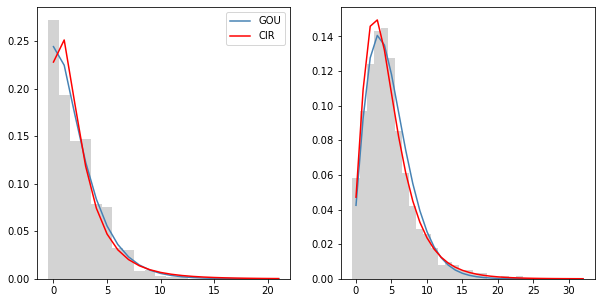

In [711]:
fig1,ax1=plt.subplots(1,2,figsize=(10,5))

# pars = results[0]['pars'][0,0]
# raw_pars = 10**pars
# pars_sde = np.zeros(5)
# pars_sde[0] = raw_pars[1]
# pars_sde[1] = raw_pars[2]
# pars_sde[2] = 1
# pars_sde[3] = 10
# pars_sde[4] = raw_pars[0]*pars_sde[3]
# print(mx)


gou_reduced_color='skyblue'
cir_reduced_color='lightcoral'
gou_color='steelblue'
cir_color='red'

bins = np.arange(mx[0]-8)-0.5
ax1[0].hist(sd_arr[dataset].U[gene_ind],bins,color='lightgray',density=True)

# print(reduced_guess)
# print(mx)
y = get_GOU_2sp([mx[0],1],pars_sde_gou)
ax1[0].plot(y,'-',color=gou_color,label='GOU')
y = get_CIR_2sp([mx[0],1],pars_sde_cir)
ax1[0].plot(y,'-',color=cir_color,label='CIR')
ax1[0].legend()

# y = model_gou.eval_model_pss(results[0]['pars'][0,0],[mx[0],1])
# ax1[0].plot(y,'-',color=gou_reduced_color)
# y = model_cir.eval_model_pss(results[0]['pars'][0,0],[mx[0],1])
# ax1[0].plot(y,'-',color=cir_reduced_color)

bins = np.arange(mx[1]-8)-0.5
ax1[1].hist(sd_arr[dataset].S[gene_ind],bins,color='lightgray',density=True)

y = get_GOU_2sp([1,mx[1]],pars_sde_gou).squeeze()
ax1[1].plot(y,'-',color=gou_color)
y = get_CIR_2sp([1,mx[1]],pars_sde_cir).squeeze()
ax1[1].plot(y,'-',color=cir_color)

# y = model_gou.eval_model_pss(results[0]['pars'][0,0],[1,mx[1]])
# ax1[1].plot(y,'-',color=gou_reduced_color)
# y = model_cir.eval_model_pss(results[0]['pars'][0,0],[1,mx[1]])
# ax1[1].plot(y,'-',color=cir_reduced_color)



In [709]:
pars_sde_gou

array([0.69846587, 0.34059974, 1.        , 5.33865792, 8.58307563])

In [710]:
pars_sde_cir

array([1.11828597, 0.55709416, 1.        , 3.70344119, 9.69163971])

In [718]:
lik_ratio, logL_gou, logL_cir = get_lik_ratio(pars_sde_gou,pars_sde_cir,sd_arr[dataset],gene_ind)

In [723]:
np.exp(lik_ratio)

0.0008416052667578937

In [724]:
# logL_cir

In [806]:
results[2]['par_initial_guess']

array([[ 0.61372314,  0.71400019, -0.0534286 ],
       [ 0.49207032,  0.28764252, -0.13998206],
       [ 0.51649076,  0.33332578,  0.259165  ],
       [ 0.65798982,  0.90407471, -0.06664039],
       [ 0.50257677,  0.43672378, -0.08166862],
       [ 0.56896899,  0.32475503, -0.04905389],
       [ 0.57303585,  0.45543787, -0.22442979],
       [ 0.57096672,  0.3093385 , -0.05130626],
       [ 0.59825045,  0.57515689, -0.09370603],
       [ 0.60444444,  1.11465733, -0.27654753],
       [ 0.6247251 ,  0.85859456, -0.50929776],
       [ 0.57455281,  0.46505862, -0.04826072],
       [ 0.63296907,  0.6880956 , -0.21616537],
       [ 0.4161751 , -0.05985304, -0.10934765],
       [ 0.61699898,  0.91419371, -0.2923707 ],
       [ 0.25186238,  0.25695717, -0.21070212],
       [ 0.66102217,  0.78704108, -0.65377645],
       [ 0.60307264,  0.05641369,  0.05646185],
       [ 0.56458335,  0.75621751, -0.41151128],
       [ 0.52427475,  0.90574789, -0.17088431],
       [ 0.4134201 ,  0.25317057, -0.036

In [921]:
def get_MLE(model,U,S,reduced_guess,disp=True,limit='fast',n_restarts = 4):
    data = np.unique(np.vstack((U,S)).astype(int),\
                     axis=1,return_counts=True)
    initial_guess = np.zeros(4)
    raw_guess = 10**reduced_guess
    if limit=='fast':
        initial_guess[0] = raw_guess[1] #beta
        initial_guess[1] = raw_guess[2] #gamma
        initial_guess[2] = 5.9 #kappa -- must be pretty fast
        initial_guess[3] = raw_guess[0]*initial_guess[2] #theta
    elif limit=='slow':
        initial_guess[2] = 1/raw_guess[0] #alpha=a/kappa, a set to 1
        initial_guess[3] = 4 #theta: arbitary
        initial_guess[0] = raw_guess[1]*initial_guess[3] #beta
        initial_guess[1] = raw_guess[2]*initial_guess[3] #gamma
    log_initial_guess = np.log10(initial_guess)
    
    if model=='CIR':
        pssfun = get_CIR_2sp
    if model=='GOU':
        pssfun = get_GOU_2sp
    phys_lb = np.asarray([-2]*4)+np.random.randn(4)*0.02
    phys_ub = np.asarray([2]*4)+np.random.randn(4)*0.02
        
    err = np.inf
    err_thr = 0.99
    
    for restart in range(n_restarts):
        if restart>0:
            log_initial_guess = np.random.rand(4) * (phys_ub-phys_lb) + phys_lb
        grad_bnd=scipy.optimize.Bounds(phys_lb,phys_ub)
        res_arr = scipy.optimize.minimize(lambda x: get_kld(x,pssfun,data),
                            x0=log_initial_guess, \
                            bounds=grad_bnd,\
                            options={'maxiter':10,'disp':disp})
        if res_arr.fun<err*err_thr:
            x=res_arr.x
            err=res_arr.fun
    return x
    
def convert_pars(pars): #go from log10 4 parameters to raw 5 parameters
    raw_pars = 10**pars
    pars_sde = np.zeros(5)
    pars_sde[0] = raw_pars[0] #beta
    pars_sde[1] = raw_pars[1] #gamma
    pars_sde[2] = 1
    pars_sde[3] = raw_pars[2] #kappa
    pars_sde[4] = raw_pars[3] #theta
    return pars_sde

def get_lik_ratio(pars_gou,pars_cir,U,S,EPS=1e-15):
    data = np.unique(np.vstack((U,S)).astype(int),\
                     axis=1,return_counts=True)
    unique_values, counts = data
    coords = tuple([tuple(x) for x in unique_values.T])
    mx = unique_values.max(1)+10
    pss_gou = get_GOU_2sp(np.copy(mx),pars_gou)
    pss_cir = get_CIR_2sp(np.copy(mx),pars_cir)
    
    pss_gou[pss_gou<EPS] = EPS
    pss_gou = [pss_gou[x] for x in coords]
    pss_cir[pss_cir<EPS] = EPS
    pss_cir = [pss_cir[x] for x in coords]
    logL_gou = (counts * np.log(pss_gou)).sum()
    logL_cir = (counts * np.log(pss_cir)).sum()
    lik_ratio = logL_cir - logL_gou
    return lik_ratio, logL_gou, logL_cir
    
    

def get_kld(pars,pssfun,data,EPS=1e-15):
    unique_values, counts = data
    mx = unique_values.max(1)+10
    proposal_probabilities = pssfun(np.copy(mx),convert_pars(pars))
    proposal_probabilities[proposal_probabilities<EPS] = EPS
    coords = tuple([tuple(x) for x in unique_values.T])
    proposal_probabilities = [proposal_probabilities[x] for x in coords]
    kld = counts * np.log(counts / proposal_probabilities)
    return np.sum(kld)


In [837]:
from numpy.fft import irfftn
x_gauss,w_gauss = scipy.special.roots_legendre(60, mu=False)

def get_gf_GOU_2sp_ODE(g0, g1, params):
    beta_0, beta_1, a, kappa, theta = params     # get parameters
    
    c0 = (g0) + (beta_0/(beta_1 - beta_0))*(g1)       #  relevant linear combinations of g_i
    c1 = - (beta_0/(beta_1 - beta_0))*(g1)   
    
    min_fudge, max_fudge = 1, 10                                     # Determine integration time scale / length
    dt = np.min([1/kappa, 1/theta, 1/beta_0, 1/beta_1])*min_fudge
    t_max = np.max([1/kappa, 1/theta, 1/beta_0, 1/beta_1])*max_fudge
    num_tsteps = int(np.ceil(t_max/dt))
    
    t_array = np.linspace(0, t_max, num_tsteps+1)
    t_array = t_array.reshape((1, num_tsteps + 1))
    
    q = np.zeros((g0.shape[0], num_tsteps + 1), dtype=np.complex64)    # initialize array to store ODE
    c0 = c0.reshape((c0.shape[0],1))
    c1 = c1.reshape((c1.shape[0],1))
#     print('kappa and splicing rate')
#     print(kappa)
#     print(beta_0)
    q0 = theta*c0*(np.exp(-beta_0*t_array) - np.exp(-kappa*t_array))/(kappa - beta_0) 
    q1 = theta*c1*(np.exp(-beta_1*t_array) - np.exp(-kappa*t_array))/(kappa - beta_1)
    q = q0 + q1
    

    integrand = q/(1-q)
    integral = np.trapz(integrand, dx=dt, axis=1)     # integrate ODE solution
    gf = np.exp( a*integral)               # get generating function
    return gf


# Get Pss for 2 species GOU model via ODE method
def get_GOU_2sp(mx, params):
    # Get generating function argument
    u = []
    half = np.copy(mx[:])
    half[-1] = mx[-1]//2 + 1
    for i in range(len(mx)):
        l = np.arange(half[i])
        u_ = np.exp(-2j*np.pi*l/mx[i])-1
        u.append(u_)
    g = np.meshgrid(*[u_ for u_ in u], indexing='ij')
    for i in range(len(mx)):
        g[i] = g[i].flatten()
    
    # Get generating function
    gf = get_gf_GOU_2sp_ODE(g[0], g[1], params)                    
    gf = gf.reshape(tuple(half))
    
    Pss = irfftn(gf, s=mx)                        # Get Pss by inverse fast Fourier transform
    Pss = np.abs(Pss)/np.sum(np.abs(Pss))           # Normalize
    return Pss

In [838]:
# ODE for 2 species CIR model
def f_2sp(q, t, c0, c1, params):
    beta_0, beta_1, a, kappa, theta = params
    result = - kappa*q + theta*q*q + kappa*( c0*np.exp(-beta_0*t) + c1*np.exp(-beta_1*t)  ) 
    return result


# Vectorized RK4 implementation for 2 species CIR model
def RK4_2sp(q, f, t, c0, c1, step_size, param):
    j1 = f(q, t, c0, c1, param)
    j2 = f(q + (step_size/2)*j1, t + (step_size/2), c0, c1, param)   
    j3 = f(q + (step_size/2)*j2, t + (step_size/2), c0, c1, param)   
    j4 = f(q + (step_size)*j3, t + (step_size), c0, c1, param)  
    
    q_new = q + (step_size/6)*(j1 + 2*j2 + 2*j3 + j4)
    return q_new


# Get 2 species CIR generating function using ODE method
def get_gf_CIR_2sp(g0, g1, params):
#     print('in pgf routine')
    beta_0, beta_1, a, kappa, theta = params     # get parameters
    
    c0 = (g0) + (beta_0/(beta_1 - beta_0))*(g1)       #  relevant linear combinations of g_i
    c1 = - (beta_0/(beta_1 - beta_0))*(g1)   

    t_max = (1/np.asarray(params)).max()*5   
    c0 = c0[:,None]
    c1 = c1[:,None]
    t_eval = t_max*(x_gauss+1)/2
    def intfun_(t,y):
        return f_2sp(y, t, c0, c1, params)
    rk = scipy.integrate.solve_ivp(fun=intfun_,t_span=[0,t_max],y0=np.zeros((g0.shape[0]), dtype=np.complex64),t_eval = t_eval,
                              vectorized=True)
    try:
        integral = np.matmul(rk.y,w_gauss[:,None]).sum(1)/2*t_max
    except:
        print('falling back on jjv solution')
        min_fudge, max_fudge = 0.5, 10                                     # Determine integration time scale / length
        dt = np.min([1/kappa, 1/theta, 1/beta_0, 1/beta_1])*min_fudge
        num_tsteps = int(np.ceil(t_max/dt))
        q = np.zeros((g0.shape[0], num_tsteps + 1), dtype=np.complex64)    # initialize array to store ODE

        # Solve ODE using RK4 method 
        for i in range(0, num_tsteps):
            t = i*dt
            q[:,i+1] = RK4_2sp(q[:,i], f_2sp, t, c0[:,0], c1[:,0], dt, params)

        integral = np.trapz(q, dx=dt, axis=1)     # integrate ODE solution
        if (~np.isfinite(integral)).any():
            print('Procedure failed.')
            print(params)
            print(rk.y.shape)
            print(w_gauss[:,None].shape)
            print(t_eval.shape)
            print(x_gauss.shape)
            print(t_max)
            
    gf = np.exp((a*theta/kappa)*integral)               # get generating function
    return gf


# Get Pss for 2 species CIR model via ODE method
def get_CIR_2sp(mx, params):
    # Get generating function argument
    u = []
    half = np.copy(mx[:])
    half[-1] = mx[-1]//2 + 1
    for i in range(len(mx)):
        l = np.arange(half[i])
        u_ = np.exp(-2j*np.pi*l/mx[i])-1
        u.append(u_)
    g = np.meshgrid(*[u_ for u_ in u], indexing='ij')
    for i in range(len(mx)):
        g[i] = g[i].flatten()
    
    # Get generating function
    gf = get_gf_CIR_2sp(g[0], g[1], params)                    
    gf = gf.reshape(tuple(half))
                              
    Pss = irfftn(gf, s=mx)                        # Get Pss by inverse fast Fourier transform
    Pss = np.abs(Pss)/np.sum(np.abs(Pss))           # Normalize
    return Pss
